In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

170508288/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [4]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [5]:
import matplotlib.pyplot as plt
import cv2

def show_images(images, labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i])
    label = labels[i].squeeze()
    axs[i].set_title(NAMES[int(label)])

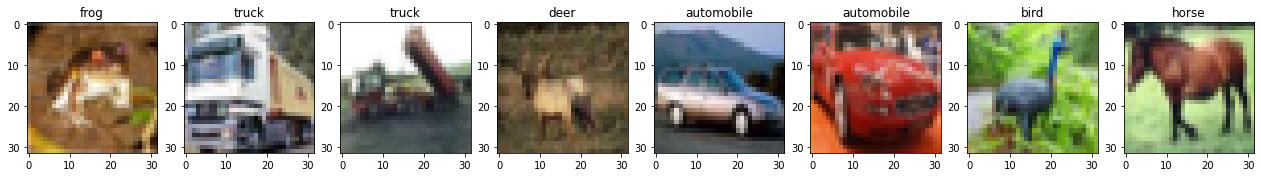

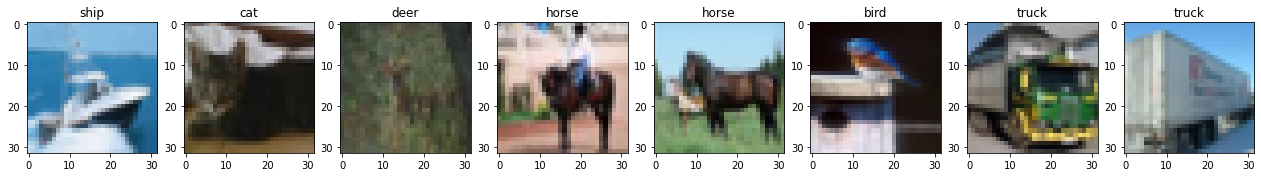

In [6]:
show_images(train_images[:8], train_labels[:8])
show_images(train_images[8:16], train_labels[8:16])

In [7]:
def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [8]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [9]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [10]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

In [11]:
train_labels.shape, test_labels.shape

((50000,), (10000,))

In [12]:
IMAGE_SIZE = 32

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [14]:
inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(inputs)
# x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
outputs = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs, outputs)

model.summary()

2022-09-16 02:42:26.567782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 14, 14, 64)        0     

2022-09-16 02:42:26.712885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 02:42:26.717638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 02:42:26.723825: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 02:42:26.724227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [15]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)

2022-09-16 02:42:32.397115: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-09-16 02:42:34.413622: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


665/665 [==============================] - 14s 8ms/step - loss: 1.7783 - accuracy: 0.3337 - val_loss: 1.4683 - val_accuracy: 0.4677
Epoch 2/30
665/665 [==============================] - 4s 7ms/step - loss: 1.3968 - accuracy: 0.4887 - val_loss: 1.2161 - val_accuracy: 0.5637
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1893 - accuracy: 0.5763 - val_loss: 1.1534 - val_accuracy: 0.5932
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 1.0344 - accuracy: 0.6380 - val_loss: 0.9717 - val_accuracy: 0.6585
Epoch 5/30
665/665 [==============================] - 4s 7ms/step - loss: 0.9144 - accuracy: 0.6805 - val_loss: 0.8313 - val_accuracy: 0.7087
Epoch 6/30
665/665 [==============================] - 5s 7ms/step - loss: 0.8394 - accuracy: 0.7031 - val_loss: 0.8267 - val_accuracy: 0.7031
Epoch 7/30
665/665 [==============================] - 4s 7ms/step - loss: 0.7616 - accuracy: 0.7339 - val_loss: 0.7642 - val_accuracy: 0.7349
Epoch 8/30
665/6

In [17]:
import matplotlib.pyplot as plt

def show_history(history):
  plt.figure(figsize=(6, 6))
  plt.yticks(np.arange(0, 1, 0.05))
  plt.plot(history.history['accuracy'], label='train_accuracy')
  plt.plot(history.history['val_accuracy'], label='valid_accuracy')
  plt.legend()

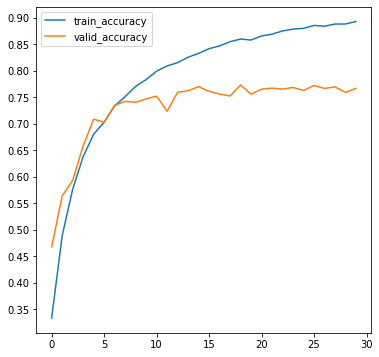

In [18]:
show_history(history)

In [19]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.8505 - accuracy: 0.7610


[0.8504958748817444, 0.7609999775886536]

In [20]:
preds = model.predict(test_images[0])

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [22]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))

preds.shape, preds

((1, 10),
 array([[9.3737268e-05, 4.8754937e-05, 4.8215516e-05, 9.5153427e-01,
         5.7819596e-04, 3.5835311e-02, 1.7172363e-04, 1.5452415e-03,
         9.3888296e-03, 7.5570145e-04]], dtype=float32))

In [23]:
preds = model.predict(test_images[:32], batch_size=32)

preds.shape, preds

((32, 10),
 array([[9.37360892e-05, 4.87561338e-05, 4.82155519e-05, 9.51534033e-01,
         5.78200794e-04, 3.58356200e-02, 1.71723106e-04, 1.54524727e-03,
         9.38882306e-03, 7.55705987e-04],
        [1.08433396e-08, 6.64773495e-07, 3.66965980e-20, 7.70238399e-15,
         3.26217028e-20, 3.54793436e-20, 2.27589762e-17, 2.39011187e-24,
         9.99999285e-01, 2.20744378e-11],
        [2.57248759e-01, 3.13132219e-02, 8.71386321e-04, 1.35129737e-02,
         2.95174657e-03, 7.27415609e-04, 4.66679502e-03, 1.15331693e-03,
         6.07951939e-01, 7.96025321e-02],
        [9.99094605e-01, 6.99285838e-11, 7.99591187e-04, 1.33528715e-06,
         1.10355195e-07, 2.60481328e-12, 2.27871697e-11, 2.07346122e-08,
         1.04347426e-04, 4.94517760e-09],
        [4.84205202e-07, 6.10434192e-09, 8.83805845e-03, 3.15373614e-02,
         1.12697273e-01, 8.58562362e-06, 8.46915960e-01, 3.66048036e-09,
         2.15248383e-06, 4.79740869e-08],
        [1.95267366e-03, 2.86416872e-03, 2.643109

In [24]:
predicted_class = np.argmax(preds, axis=1)

predicted_class

array([3, 8, 8, 0, 6, 6, 1, 2, 3, 9, 0, 9, 3, 7, 9, 8, 5, 7, 0, 6, 5, 0,
       4, 9, 4, 0, 4, 0, 9, 6, 6, 5])

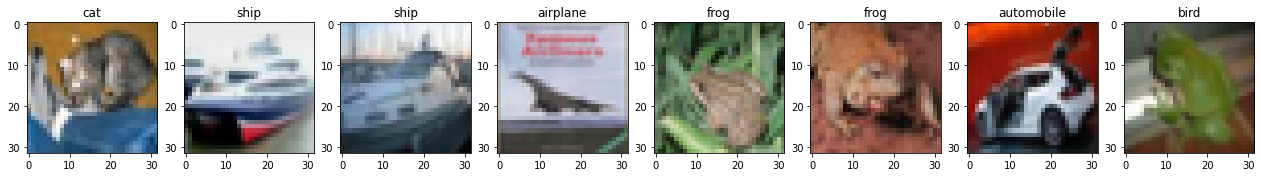

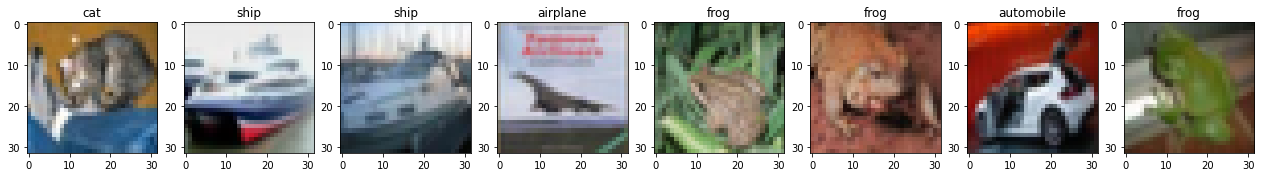

In [25]:
show_images(test_images[:8], predicted_class[:8])
show_images(test_images[:8], test_labels[:8])

In [2]:
numbers = np.random.normal(loc=0.0, scale=0.01, size=(100, 100))

numbers

array([[ 0.00521426,  0.00338657,  0.00674406, ..., -0.0010637 ,
         0.01312005,  0.01078353],
       [ 0.02182258,  0.01033945, -0.00168116, ..., -0.0015624 ,
         0.01872927,  0.00761626],
       [ 0.01418216, -0.0038016 , -0.00506868, ...,  0.00577522,
        -0.01179758,  0.00213214],
       ...,
       [-0.00612076, -0.01193013,  0.00822623, ...,  0.00714705,
        -0.0031872 , -0.01973328],
       [-0.01789212,  0.00902257,  0.01141246, ...,  0.00112577,
         0.01456629,  0.01128218],
       [ 0.00233604, -0.01081256,  0.00234695, ..., -0.00307639,
         0.00513321,  0.00079992]])

In [3]:
numbers.mean(), numbers.std(), numbers.sum() 

(0.00017109898081437845, 0.010019701861061724, 1.7109898081437844)

In [4]:
fan_in = 10
fan_out = 8

scale_value = np.sqrt(2 / (fan_in + fan_out))
scale_value

0.3333333333333333

In [5]:
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))

weights

array([[ 0.08436625, -0.02719645, -0.33880759, ...,  0.01608372,
        -0.57375169,  0.03842821],
       [-0.24008782, -0.12134897, -0.4002453 , ..., -0.10144424,
         0.17331334, -0.14581818],
       [-0.35343766,  0.26759821, -0.12464378, ...,  0.01780343,
         0.25006328, -0.06507318],
       ...,
       [ 0.02533266,  0.05663451,  0.1511845 , ..., -0.30492397,
        -0.3837356 , -0.37218864],
       [-0.19546807, -0.151682  ,  0.139248  , ..., -0.2375402 ,
        -0.30224975,  0.03145412],
       [-0.07892763,  0.55744231, -0.10355785, ..., -0.48480904,
        -0.3622815 , -0.77599819]])

In [6]:
weights.mean(), weights.std(), weights.sum()

(-0.005244875223179067, 0.3303827993772655, -52.448752231790664)

In [7]:
fan_in = 10
fan_out = 8

limit = np.sqrt(6 / (fan_in + fan_out))

limit

0.5773502691896257

In [8]:
weights = np.random.uniform(-limit, limit, size=(100, 100))

weights

array([[-0.39416686, -0.10802779,  0.21181894, ...,  0.49888805,
         0.03280549, -0.46276061],
       [ 0.20459544,  0.49077501,  0.39816319, ...,  0.53282933,
         0.27967318,  0.35429122],
       [ 0.46442083,  0.1323381 , -0.55237456, ..., -0.10176703,
        -0.52488191, -0.46258551],
       ...,
       [-0.09460239, -0.37468988, -0.51384558, ...,  0.56044618,
         0.03598985,  0.00452806],
       [-0.32984627,  0.52643726,  0.56225458, ...,  0.44755016,
        -0.4840112 , -0.48336685],
       [ 0.18983206,  0.40941723,  0.16843453, ..., -0.15579739,
         0.06716909,  0.02820092]])

In [9]:
weights.mean(), weights.std(), weights.sum()

(0.002918825974560505, 0.33314012722232367, 29.188259745605052)

In [10]:
fan_in = 10
fan_out = 8

scale_value = np.sqrt(2 / fan_in)
scale_value

0.4472135954999579

In [11]:
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))

weights

array([[ 0.06493665,  0.33810583, -0.30756011, ...,  0.39389252,
        -0.37661199,  0.09445296],
       [ 0.09223955, -0.38389488, -0.06488012, ...,  0.34041419,
         0.32761922, -0.00176718],
       [ 0.59768553, -0.25487983, -0.14160077, ...,  0.06340421,
        -0.85408201, -0.83872545],
       ...,
       [-0.39764983,  0.07742125, -0.06720776, ..., -0.44042831,
         0.5305938 ,  0.51621119],
       [-0.42314823, -0.00477221,  0.18362617, ..., -1.09008427,
         0.01254769, -0.2168956 ],
       [-0.36316908, -0.37941789, -0.13828804, ...,  0.61403054,
         0.60857697,  0.15912798]])

In [12]:
weights.mean(), weights.std(), weights.sum()

(0.0015695135316069091, 0.44773494543225045, 15.695135316069091)

In [13]:
fan_in = 10
fan_out = 8

limit = np.sqrt(6 / fan_in)

limit

0.7745966692414834

In [14]:
weights = np.random.uniform(-limit, limit, size=(100, 100))

weights

array([[ 0.58449783,  0.44369433, -0.58732322, ...,  0.31367877,
        -0.65768918, -0.28697437],
       [ 0.09082018, -0.0302009 ,  0.30947467, ...,  0.22986825,
        -0.08159163,  0.74433666],
       [-0.08795956, -0.49941975, -0.2027446 , ..., -0.36089673,
        -0.50500141, -0.75862743],
       ...,
       [ 0.75480629,  0.33973006, -0.61866091, ...,  0.27852288,
         0.55954044, -0.74347398],
       [ 0.14961881, -0.10801763,  0.07630344, ...,  0.53415726,
         0.67019773, -0.38877829],
       [-0.66199186, -0.25807679,  0.51308368, ...,  0.49559001,
        -0.55483457, -0.3266281 ]])

In [15]:
weights.mean(), weights.std(), weights.sum()

(0.0035993735592399034, 0.44716724772954175, 35.993735592399034)